# Millores: Hough Transform

Una de les millores que hem probat és realitzar una Hough Transform per obtenir informació espaial de l'imatge, la idea principal era reduir els descriptors obtinguts amb SIFT, ORB o RootSIFT eliminant els "falsos resultats" que serien aquells que no pertanyarien a les linies obtingudes amb aquesta transformació. Hem aconseguit probar-ho fora el projecte amb una imatge d'exemple però no hem sigut capaços d'implementar-ho al projecte. Aqui teniu una demostració del que hem fet:

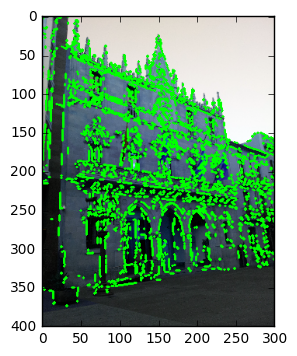

In [2]:
import cv2
import numpy as np
from get_params import get_params
import matplotlib.pyplot as plt
import os


def resize_image(params,im):

    # Get image dimensions
    height, width = im.shape[:2]

    # If the image width is smaller than the proposed small dimension, keep the original size !
    resize_dim = min(params['max_size'],width)

    # We don't want to lose aspect ratio:
    dim = (resize_dim, (height * resize_dim/width))

    # Resize and return new image
    return cv2.resize(im,dim)

def HoughTransform (params):

    img=cv2.imread(os.path.join(params['root'],params['database'],params['split'],'images','168-2743-15592.jpg'))
    img=resize_image(params,img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    dst = cv2.Canny(gray,50,150,apertureSize = 3) # Troba els extrems de la imatge
    lines=cv2.HoughLinesP(dst, 1, np.pi/180, 50, 1000, 1 ) #Threshold, minilinelenght, maxline gap
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    plt.imshow(img),plt.show()
    
params=get_params()
HoughTransform(params)

Com veiem totes les linies que obtenim formen part de l'edifici per tant creiem que d'haberla pogut implementar hauria millorat significativament els resultats.